# 17052018 kinetic spec assay

### setup
***
* 25 replicates total
* A.P stock diluted in A.P assay buffer
* samples measured at time of setup to establish linear range
* 750 uL total assay volume (in cuvette)
* no osmolytes
* no incubation

reagent | final concentration
--- | --- 
50 mM A.P @ -80 deg C | 2.5 mg/mL (1/20 dilution) in A.P assay buffer
50 mM A.P @ -80 deg C | 1.25 mg/mL (1/40 dilution) in A.P assay buffer
50 mM A.P @ -80 deg C | .83 mg/mL (1/60 dilution) in A.P assay buffer
50 mM A.P @ -80 deg C | .416 mg/mL (1/120 dilution) in A.P assay buffer
50 mM A.P @ -80 deg C | .25 mg/mL (1/200 dilution) in A.P assay buffer
50 mM A.P @ -80 deg C | .2 mg/mL (1/250 dilution) in A.P assay buffer
50 mM A.P @ -80 deg C | .166 mg/mL (1/300 dilution) in A.P assay buffer
PNPP | 50 mg/mL

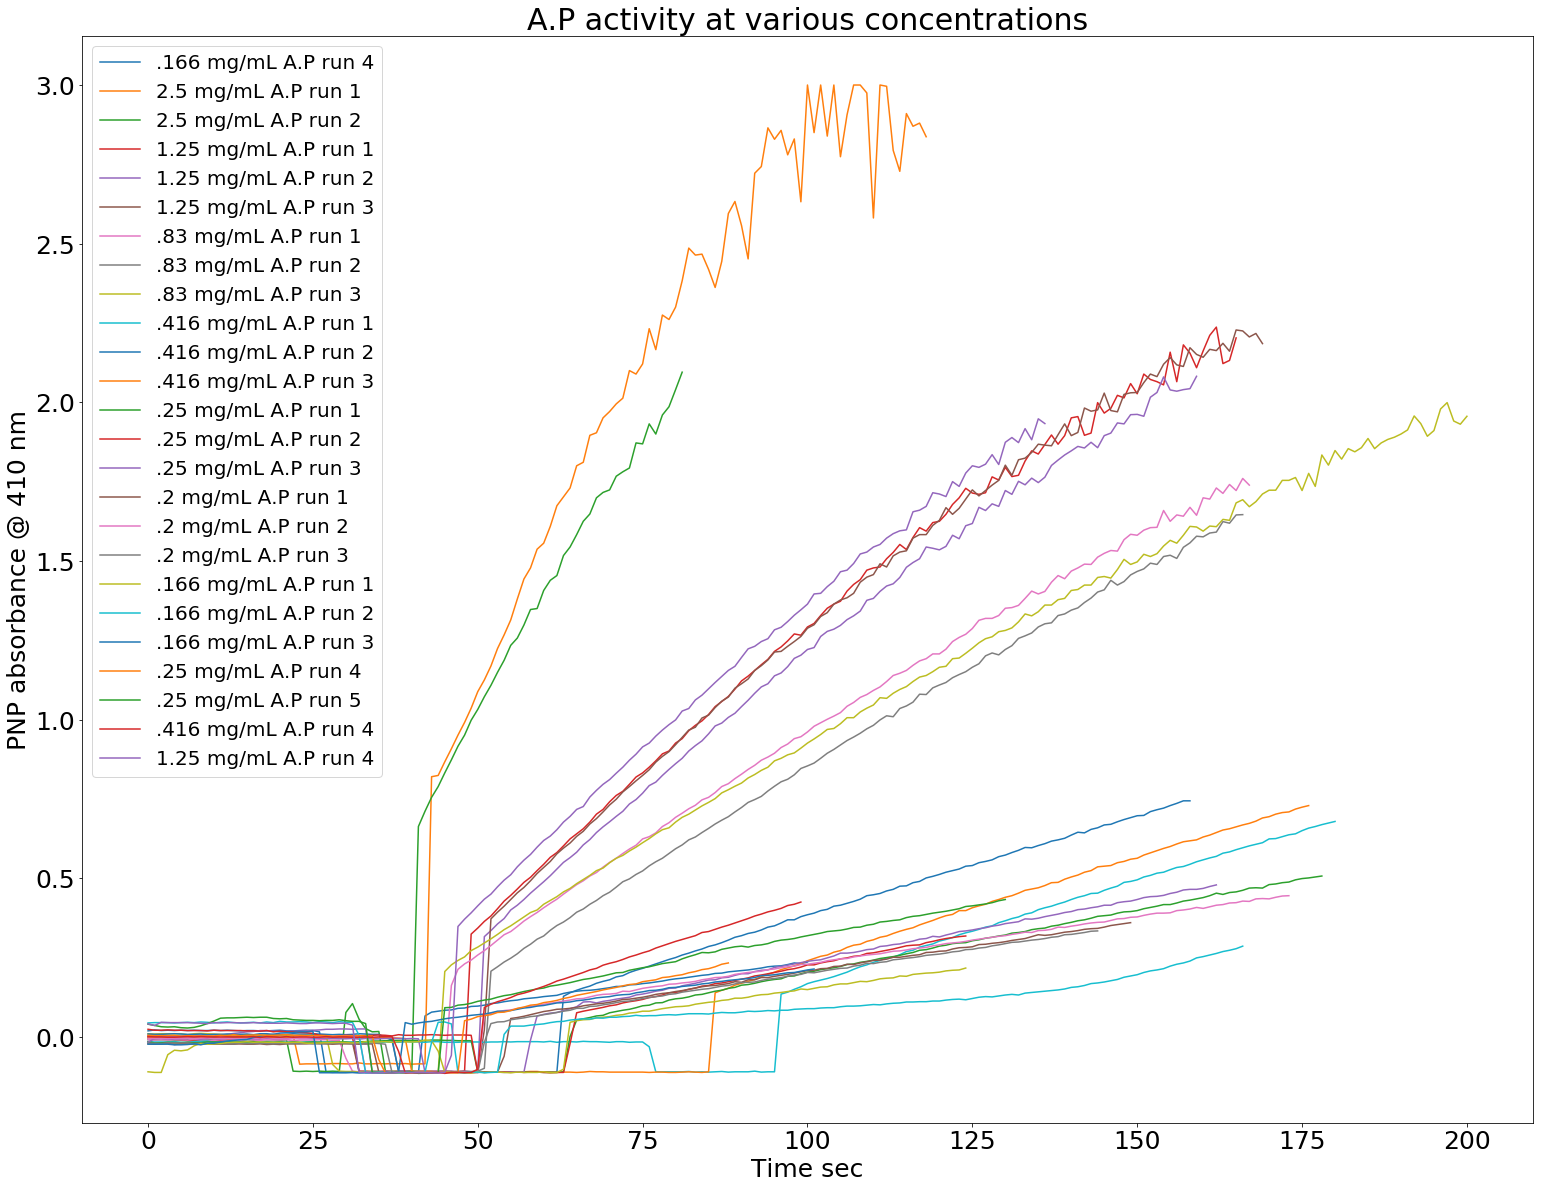

In [4]:
import csv
import sys
sys.path.insert(0, 'process_csv/')
from process_csv import *
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import requests
with open("dataset/ap_17052018.csv") as file:
    reader=csv.reader(file)
    data=list(reader)
header=data[0]
i=0
j=1
csvdict={}
while i<len(data[j]):
    csvdict[header[i]]=[]
    while j<len(data):
        csvdict[header[i]].append(data[j][i])
        j+=1
    j=1
    i+=1
for key,val in csvdict.items():
    val=list(map(float, [a for a in val if a]))
    csvdict[key]=val
for i in range(1,len(header)):
    plt.plot(csvdict[header[i]],label=header[i])
plt.xlabel("Time sec")
plt.ylabel("PNP absorbance @ 410 nm")
plt.title("A.P activity at various concentrations")
plt.rcParams["figure.figsize"] = [26,20]
plt.rcParams.update({'font.size': 25})
plt.legend(prop={'size': 20})

LinregressResult(slope=0.9954194880582866, intercept=-0.015472605097257897, rvalue=0.9954713702999839, pvalue=5.155983992471391e-25, stderr=0.019820728036954248) 

A.P concentration in buffer mg/mL  ,  avg initial velocity /min  , stdev
2.5 , 2.5422000000000002 , 0.15239999999999987
1.25 , 1.1736 , 0.02407114455110099
0.833333333 , 0.7582 , 0.055417686707404164
0.416666667 , 0.41607 , 0.006482430099893101
0.25 , 0.25792800000000005 , 0.0065458212624544005
0.2 , 0.19665999999999997 , 0.005233965991482939
0.166666667 , 0.1557 , 0.03363445554784557


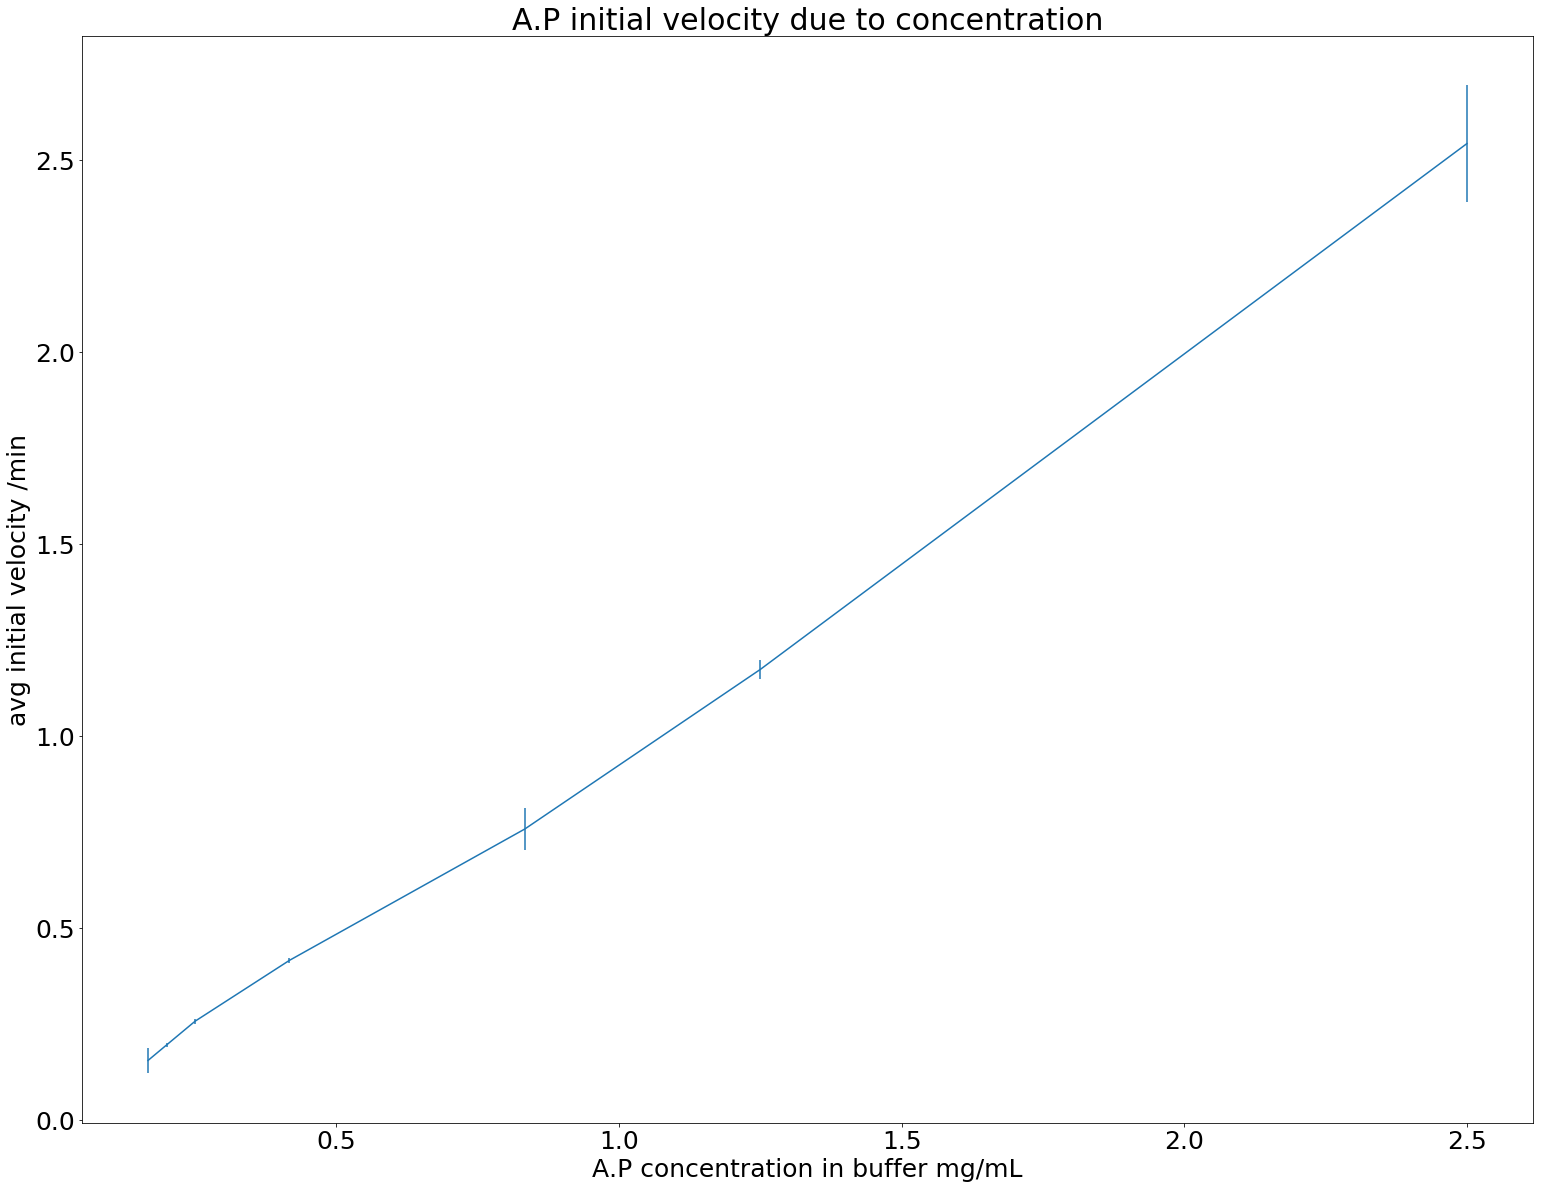

In [3]:
import csv
import sys
sys.path.insert(0, 'process_csv/')
from process_csv import *
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import requests
from collections import defaultdict
with open("dataset/ap_17052018_init_vel.csv") as file:
    reader=csv.reader(file)
    data=list(reader)
header=data[0]
i=0
j=1
csvdict={}
while i<len(data[j]):
    csvdict[header[i]]=[]
    while j<len(data):
        csvdict[header[i]].append(data[j][i])
        j+=1
    j=1
    i+=1
for key,val in csvdict.items():
    val=list(map(float, [a for a in val if a]))
    csvdict[key]=val
coord=list(zip(csvdict[header[0]],csvdict[header[1]]))
meanval=[]
stdev=[]
coord_dict=defaultdict(list)
for x,y in coord:
    coord_dict[x].append(y)
for key,val in coord_dict.items():
    meanval.append(np.mean(val))
    stdev.append(np.std(val))
xval=list(coord_dict.keys())
plt.errorbar(xval,meanval,stdev)
plt.xlabel("A.P concentration in buffer mg/mL")
plt.ylabel("avg initial velocity /min")
plt.title("A.P initial velocity due to concentration")
plt.rcParams["figure.figsize"] = [26,20]
plt.rcParams.update({'font.size': 25})
print(linregress(csvdict[header[0]],csvdict[header[1]]),"\n")
print("A.P concentration in buffer mg/mL", " , ", "avg initial velocity /min", " , " "stdev")
for x,y,z in zip(xval,meanval,stdev):
    print(x,",",y,",",z)

### Summary
***
Strong linear correlation between initial velocity and A.P concentration in buffer.